# 1. What is Computer Vision?
Computer vision is a field of artificial intelligence (AI) that uses machine learning and neural networks to teach computers and systems to derive meaningful information from digital images, videos and other visual inputs—and to make recommendations or take actions when they see defects or issues.<Br>
### Applications:
1. Google images
2. Object detection
3. Autonomous vehicles
4. Face recognition
5. Agriculture
6. Medical Imaging
7. Manufacturing and convener belts
8. Human Pose detection


In [ ]:
from IPython.core.display import display, HTML

display(HTML('''
    <div style="display: flex; gap: 10px;">
        <img src="CV 1.jpeg" width="300"/>
        <img src="CV 2.jpeg" width="300"/>
    </div>
'''))

# How are images and videos represented in computer?

## Pixels(Picture elements)
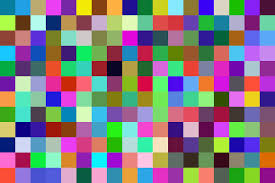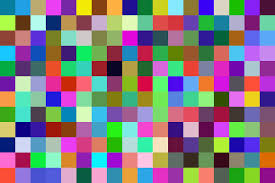

### RGB 
1. Red
2. Green
3. Blue

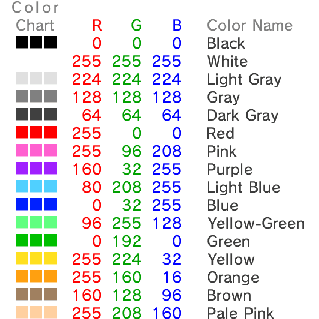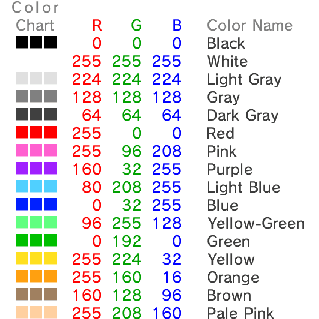

#### Representation example
[ <br>
  [[255, 0, 0], [0, 255, 0]], <br>
  [[0, 0, 255], [255, 255, 255]] <br>
] <br>


In [ ]:
!pip install mediapipe opencv-python

In [1]:
import cv2
import numpy as np

# Read image
image=cv2.imread('image.jpeg')
print("Shape of image:", image.shape)  # (Height, Width, 3)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
## OpenCV (cv2) reads images in BGR format by default
## cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  converts an image from BGR color format to RGB color format.
# Show image
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(rgb_image)

Shape of image: (187, 269, 3)
[[[255 255 255]
  [252 252 250]
  [254 253 251]
  ...
  [124 120 108]
  [ 99  95  83]
  [172 168 159]]

 [[255 255 255]
  [252 252 250]
  [254 253 251]
  ...
  [124 120 108]
  [ 98  94  82]
  [172 168 159]]

 [[255 255 255]
  [252 252 250]
  [253 252 250]
  ...
  [124 120 108]
  [ 98  94  82]
  [172 168 159]]

 ...

 [[255 252 243]
  [252 251 247]
  [252 255 255]
  ...
  [138 138 126]
  [107 107  95]
  [173 173 161]]

 [[254 251 242]
  [252 251 247]
  [252 255 255]
  ...
  [137 137 125]
  [107 107  95]
  [173 173 161]]

 [[254 251 242]
  [251 250 246]
  [252 255 255]
  ...
  [137 137 125]
  [107 107  95]
  [173 173 161]]]


### OpenCV
OpenCV, short for Open Source Computer Vision Library, is an open-source computer vision and machine learning software library. Originally developed by Intel, it is now maintained by a community of developers under the OpenCV Foundation.

# 2. What is object detection?

Object detection is a computer vision technique that identifies and locates objects within an image or video. It not only classifies what objects are present (like a cat, car, or person) but also draws bounding boxes around them to show their positions.
<Br>
### Applications:
1. Face detection
2. Autonomous vehicles
3. Security surveillance
4. Real-time tracking (e.g., in sports or robotics)

In [2]:
from IPython.core.display import display, HTML

display(HTML('''
    <div style="display: flex; gap: 10px;">
        <img src="OD1.jpeg" width="300"/>
        <img src="OD2.jpeg" width="300"/>
    </div>
'''))

C:\Users\abrar\AppData\Local\Temp\ipykernel_28256\1084449207.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


## 3. What is bounding box?

#### A bounding box is a rectangle drawn around an object in an image or video to show its location and size.

It’s defined by two points:
1. Top-left corner (x1, y1)
2. Bottom-right corner (x2, y2)

#### Bounding boxes are commonly used in object detection to:
1. Visually highlight detected objects
2. Provide coordinates for tracking or further processing

In [3]:
from IPython.core.display import display, HTML

display(HTML('''
    <div style="display: flex; gap: 10px;">
        <img src="BB1.jpeg" width="300"/>
        <img src="BB2.jpeg" width="300"/>
    </div>
'''))

C:\Users\abrar\AppData\Local\Temp\ipykernel_28256\2278822294.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


## 4. What is pose estimation?

Pose estimation is the computer vision technique of detecting and tracking key points (joints) of the human body (like elbows, knees, shoulders) in images or videos.
- It helps in understanding a person’s body posture or movement.
- There are two main types:
1. 2D Pose Estimation: Finds joint positions on the image plane (x, y).
2. 3D Pose Estimation: Finds joint positions in 3D space (x, y, z).

### Used in fitness tracking, animation, sports analysis, etc.

# Project Time

# Steps:
0. Install and import dependencies
1. Make detections
2. Determine Joints
3. Calculate Angles
4. Curl Counter


  ## Mediapipe is a prebuild ML models library useful specifically for pose estimation

### 0. Installing and importing dependecies

PIP is python's package management system

!pip install mediapipe opencv-python

In [4]:
import numpy as np
import cv2 ## opencv
import mediapipe as mp

mp_drawing=mp.solutions.drawing_utils ## drawing landmarks
mp_pose=mp.solutions.pose ## importing pose models

#### Setting up camera 

In [14]:
import cv2  # OpenCV for video capture and display

# Initialize the webcam (0 = default camera)
cap = cv2.VideoCapture(0)  # Could be laptop webcam, external webcam, or phone cam via USB/IP

# Continuously capture frames from the camera
while cap.isOpened():  # Loop runs only if the camera opens successfully
    ret, frame = cap.read()  # Read a frame from the webcam
    frame =cv2.flip(frame,1)
    # ret is a boolean (True if frame is read correctly)
    # frame is the actual image array from the webcam

    cv2.imshow("OpenCV feed", frame)  # Show the captured frame in a window titled "Mediapipe feed"

    # Wait for 10ms for a key press, if 'q' is pressed, break the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):  # 0xFF ensures cross-platform compatibility
        break  # Exit the loop on pressing 'q'

# Release the webcam and close the OpenCV window
cap.release()  # Frees the camera resource
cv2.destroyAllWindows()  # Closes all OpenCV windows


### 1. Make Detections

In [10]:
cap = cv2.VideoCapture(0)  # Open the default webcam

# Setup the MediaPipe Pose estimation model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # Loop to continuously get frames from the webcam
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the webcam
        frame =cv2.flip(frame,1)
        # Convert the image from BGR (OpenCV format) to RGB (MediaPipe format)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Improve performance by marking image as non-writeable

        # Process the image and detect the pose
        results = pose.process(image)

        # Convert back the image from RGB to BGR for OpenCV display
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw the pose landmarks on the image
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=5, circle_radius=5),  # For landmarks
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=5, circle_radius=5)   # For connections
        )

        # Display the image with pose landmarks
        cv2.imshow('Mediapipe Feed', image)

        # Break loop when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release webcam and close window after exiting loop
    cap.release()
    cv2.destroyAllWindows()


### 2. Determining Joints


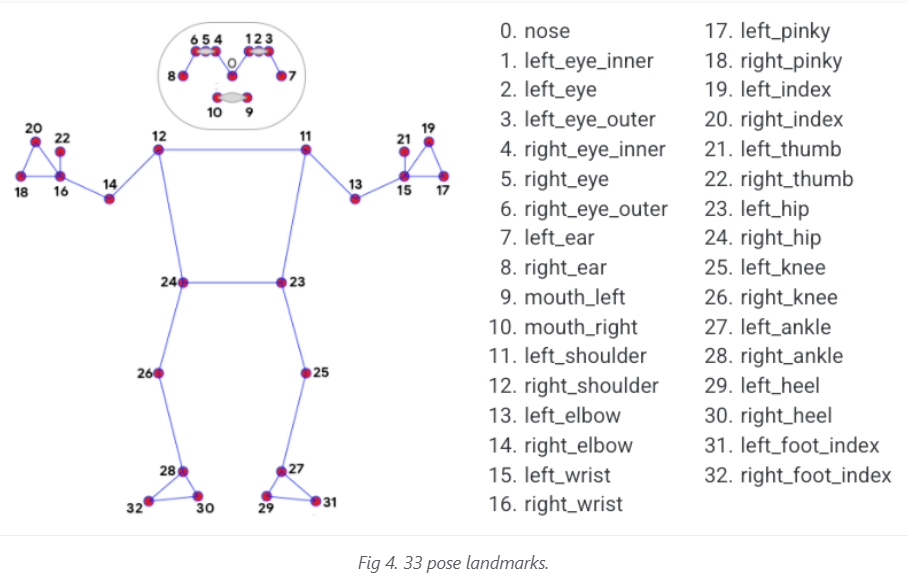

In [11]:
cap = cv2.VideoCapture(0)  # Open default webcam

# Initialize MediaPipe Pose model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()  # Capture frame
        frame =cv2.flip(frame,1)
        # Convert image to RGB for MediaPipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Improve performance

        # Run pose detection
        results = pose.process(image)

        # Convert image back to BGR for OpenCV
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Try extracting landmark data
        try:
            landmarks = results.pose_landmarks.landmark  # Get list of 33 pose landmarks
            print(landmarks)  # Print landmark data (x, y, z, visibility) for each joint
        except:
            pass  # In case no landmarks are detected in the frame

        # Draw pose landmarks and connections
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=5, circle_radius=5),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=5, circle_radius=5)
        )

        # Show the frame with pose overlay
        cv2.imshow('Mediapipe Feed', image)

        # Exit when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Clean up
    cap.release()
    cv2.destroyAllWindows()


[x: 0.341849059
y: 0.756319165
z: -1.38910902
visibility: 0.999149561
, x: 0.39732784
y: 0.659929514
z: -1.38254249
visibility: 0.998581529
, x: 0.430933774
y: 0.656787515
z: -1.38274431
visibility: 0.999045193
, x: 0.457574904
y: 0.654420257
z: -1.38352239
visibility: 0.999005735
, x: 0.307157069
y: 0.661177397
z: -1.31977093
visibility: 0.998118043
, x: 0.284464419
y: 0.659637094
z: -1.31778288
visibility: 0.99801755
, x: 0.265486598
y: 0.658548951
z: -1.3176831
visibility: 0.997015119
, x: 0.508320332
y: 0.663958311
z: -0.963526845
visibility: 0.99946934
, x: 0.264872849
y: 0.669912457
z: -0.639535725
visibility: 0.997801602
, x: 0.407954037
y: 0.836935043
z: -1.20628011
visibility: 0.999638796
, x: 0.303186268
y: 0.841374815
z: -1.11489189
visibility: 0.999201834
, x: 0.751764417
y: 0.986120105
z: -0.683390141
visibility: 0.999605
, x: 0.163741484
y: 0.949240327
z: -0.108933948
visibility: 0.998236895
, x: 0.948344827
y: 1.48545158
z: -0.710843205
visibility: 0.346702
, x: 0.037273

In [12]:
# Prints the total number of landmarks detected (33 for full-body pose)
print(len(landmarks))  

# Loops through all pose landmarks (like LEFT_SHOULDER, RIGHT_KNEE) and prints their enum names
for lndmrk in mp_pose.PoseLandmark:  
    print(lndmrk)  


33
PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


### 3. Calculate Angles

In [15]:
def calculate_angle(a, b, c):
    a = np.array(a)  # Convert point 'a' into a numpy array
    b = np.array(b)  # Convert point 'b' into a numpy array (middle point, vertex of the angle)
    c = np.array(c)  # Convert point 'c' into a numpy array

    # Calculate the angle between points a, b, and c using the arctangent of the slope of the lines
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    
    # Convert radians to degrees
    angle = np.abs(radians * 180.0 / np.pi)
    
    # Ensure the angle is between 0 and 180 degrees
    if angle > 180.0:
        angle = 360 - angle
    
    return angle  # Return the angle


### 4. Curl Counter

In [1]:

# Calculate all 4 required angles
angle_elbow_l = calculate_angle(shoulder_l, elbow_l, wrist_l)
angle_elbow_r = calculate_angle(shoulder_r, elbow_r, wrist_r)
angle_shoulder_l = calculate_angle(hip_l, shoulder_l, elbow_l)
angle_shoulder_r = calculate_angle(hip_r, shoulder_r, elbow_r)

# Update the logic
if angle_elbow_l < 90 and angle_elbow_r < 90 and angle_shoulder_l < 60 and angle_shoulder_r < 60:
    stage = "down"
if angle_elbow_l > 160 and angle_elbow_r > 160 and angle_shoulder_l > 60 and angle_shoulder_r > 60 and stage == 'down':
    stage = "up"
    counter += 1


NameError: name 'cv2' is not defined